In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error as mdae
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
# Python
spikes = pd.DataFrame([
    {'holiday': 'spike_1', 'ds': '2022-01-09', 'lower_window': 0, 'ds_upper': '2022-06-26'},
    {'holiday': 'spike_2', 'ds': '2022-07-03', 'lower_window': 0, 'ds_upper': '2022-09-02'},
])
for t_col in ['ds', 'ds_upper']:
    spikes[t_col] = pd.to_datetime(spikes[t_col])
spikes['upper_window'] = (spikes['ds_upper'] - spikes['ds']).dt.days
spikes


,holiday,ds,lower_window,ds_upper,upper_window
0,spike_1,2022-01-09,0,2022-06-26,168
1,spike_2,2022-07-03,0,2022-09-02,61


In [3]:
df = pd.read_csv('south-korea-new-cases-prophet.csv')
df.head()

,ds,y
0,1/3/2020,0
1,1/4/2020,0
2,1/5/2020,0
3,1/6/2020,0
4,1/7/2020,0


In [4]:
total_rows = df.shape[0] # get the total number of rows in the dataframe
train_rows = int(total_rows * 0.8) # calculate 80% of the total rows
test_rows = int(total_rows * 0.2) # calculate 20% of the total rows
train = df.iloc[:train_rows] # use the first train_rows as train set
test = df.iloc[-test_rows:] # use the last test_rows as test set
y_test = test['y'].values # get the actual values of y in test set

In [5]:
m2 = Prophet(holidays=spikes)
m2.fit(train)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:38 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Spikes as one-off holidays')

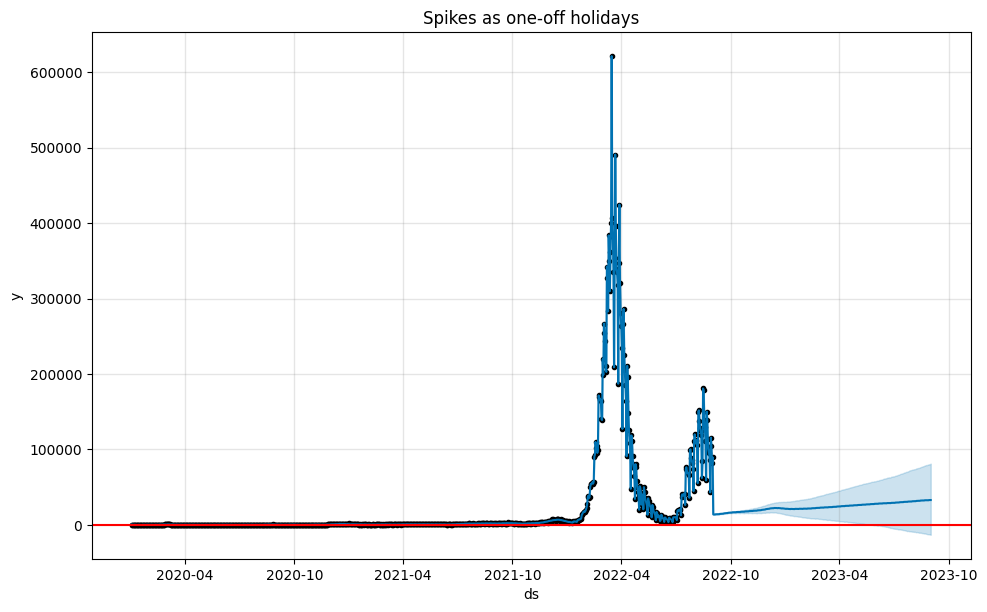

In [6]:
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('Spikes as one-off holidays')

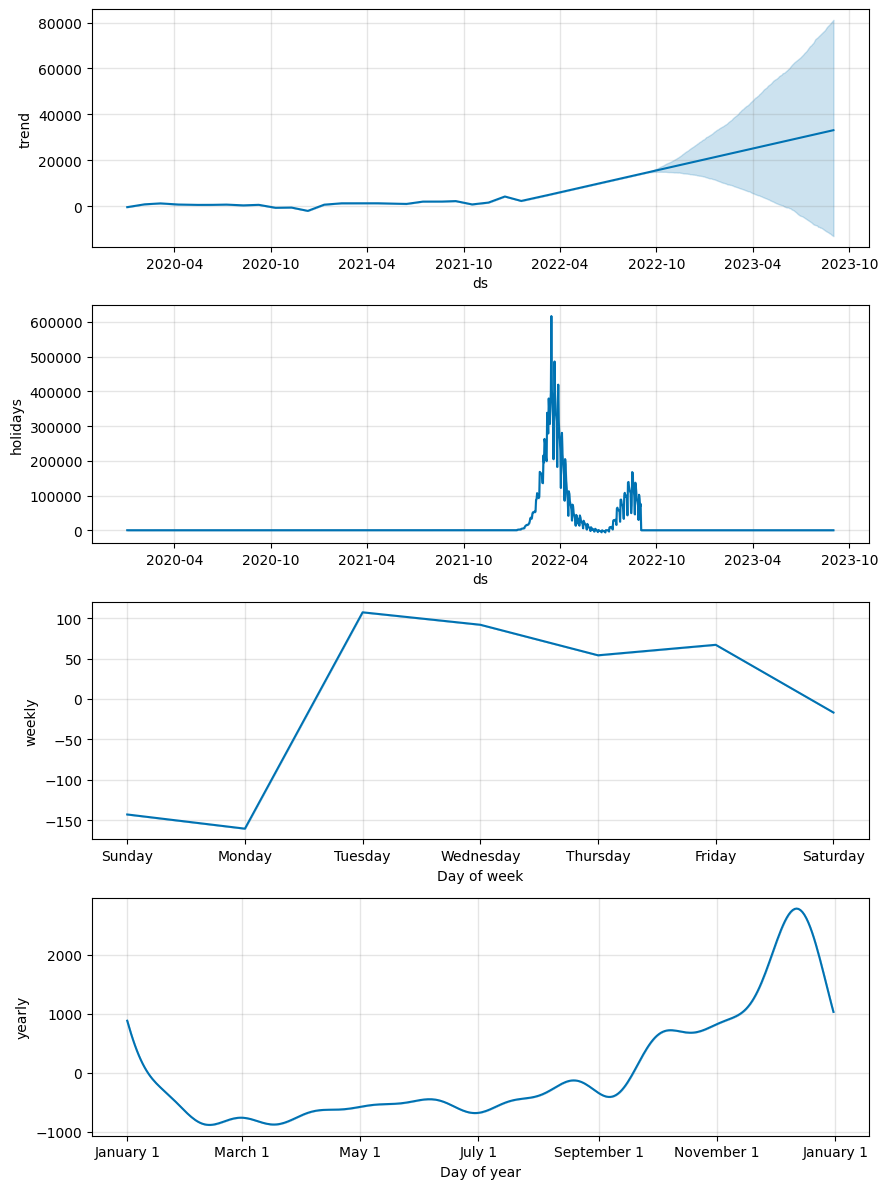

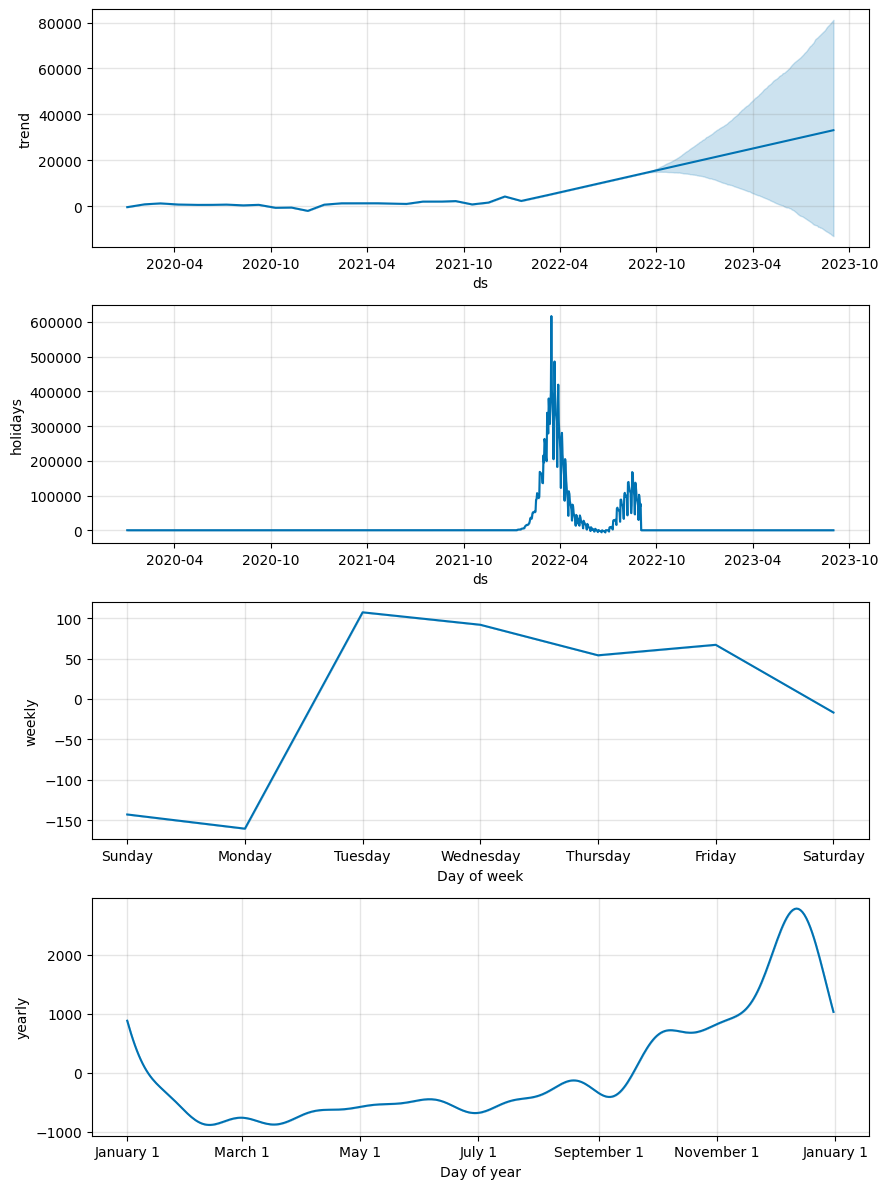

In [7]:
m2.plot_components(forecast2)

In [8]:
# get the predicted values of y in test set
y_pred = forecast2['yhat'].values[-test_rows:]

In [9]:
# calculate the RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f'The RMSE value is {rmse:.2f}')

The RMSE value is 26575.92


In [10]:
# calculate the MAE
mae = mean_absolute_error(y_test, y_pred) 
print(f'The MAE value is {mae:.2f}')

The MAE value is 21906.18


In [11]:
# calculate the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) 
print(f'The MAPE value is {mape:.2f}')

The MAPE value is 1786878066199945472.00


In [17]:
mdape_value = mdae(y_test, y_pred) / np.median(y_test)
print(f'The MdAPE value is {mdape_value:.3f}')

The MdAPE value is 0.805
